# Auther: Muhammad Umar Javed

## Classification of iris DataSet using SVM
#### Library required 
* NumPy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
* Pandas: it offers data structures and operations for manipulating numerical tables and time series
* SeaBorn: It provides a high-level interface for drawing attractive and informative statistical graphics.
* Sklearn: Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines
* matplotlib
* mpl_toolkits

In [20]:
# importing libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# inline ploting for jupternote book otherwise omit it
%matplotlib inline

In [21]:
# Impoting sklearn for Machin learing task
from sklearn import datasets
from sklearn.cross_validation import train_test_split

In [22]:
iris = datasets.load_iris()
list(iris)

['target_names', 'data', 'target', 'DESCR', 'feature_names']

### We need only its features colums which are 4 in no and one tagerts columns
**Note: our data set is in array format we need to convert into dataframs because ploting params must in the dataframe which also the fomate of pandas**

In [23]:
# converting data set in to data frame formate
dataSet = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris['feature_names'] + ['Species'])
dataSet.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [24]:
dataSet.tail(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


#### Assign features to features and targets to predictors

In [25]:
features = dataSet.ix[:,:-1]
predictors = dataSet.ix[:,4]

#### Ploting Features2 vs feature4

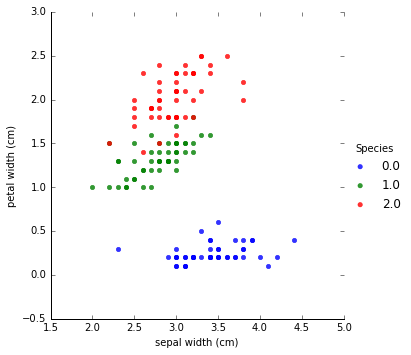

In [26]:
g = sns.lmplot(x=features.columns[1], y=features.columns[3], hue=predictors.name, data=dataSet, legend=True, fit_reg=False)

#### An other way of ploting Scatter plot using PyPlot and SeaBorn

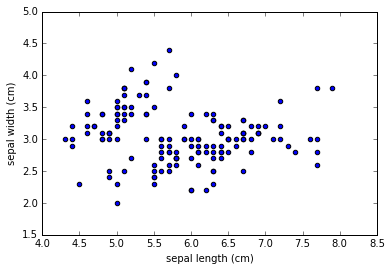

In [27]:
dataSet.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

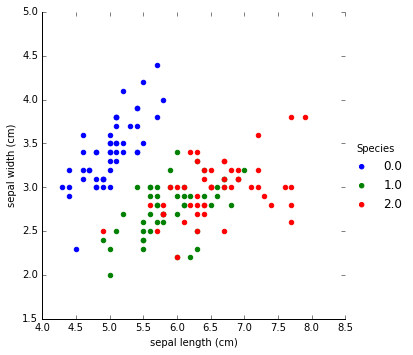

In [28]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(dataSet, hue=predictors.name, size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

#### 3d scatter plot 

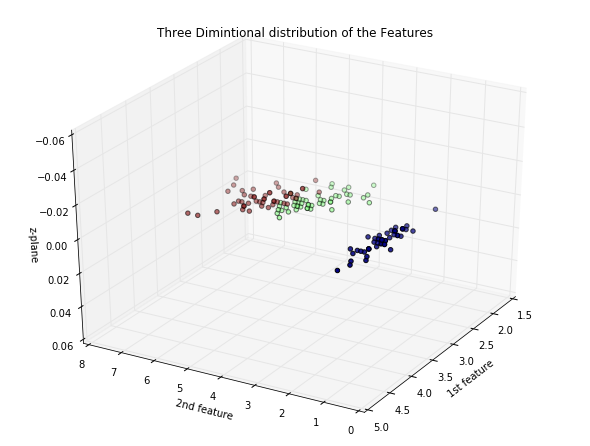

In [29]:
fig = plt.figure(1, figsize=(8, 6)) 
ax = Axes3D(fig, elev=-150, azim=150)
ax.scatter(features.ix[:,1], features.ix[:,2], zs=0, c=predictors)

ax.set_title("Three Dimintional distribution of the Features")
ax.set_xlabel("1st feature")
# ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd feature")
# ax.w_yaxis.set_ticklabels([])


ax.set_zlabel("z-plane")
# ax.w_zaxis.set_ticklabels([])

plt.show()

#### Spliting the Data set
In Machine Learing we must have the 3 seperate portion of the data set to trian validate and test our classifier. the mostly thumb rule for slpiting data in to 3 ratio like **100% = 60% train + 20% valid + 20% test** sets.
this is done because we wont bised with out=r classifers like the traing examples that are used in the 

In [30]:
xtrain, xtemp, ytrain, ytemp = train_test_split(features, predictors,
                                                random_state=1, train_size=0.6)
xvalid, xtest, yvalid, ytest = train_test_split(xtemp, ytemp,
                                                random_state=1, train_size=0.5)